# Contents
    - Import
    - Linear Regression
        - Scater plot and hypothesis
        - Reshape to Arrays
        - training and test set
        - Fit to test set
        - predict test set
        - scatterplot with regression line
        - model summary stats (slope, mean squared error, r2)
        - compare values
        - reflection

# Import

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#import df
path = r'C:\Users\kesmc\Documents\2023 Bouldering Analysis'
boulder=pd.read_pickle(os.path.join(path, 'Data', 'boulder_data_clean_2.pkl'))

In [13]:
boulder.head()

,Competition Title,Competition Date,Full Name,Nation,Start Number,Rank,Gender,Qualification,Semifinal,Final
0,IFSC Climbing Worldcup (B) - Vail (USA) 2019,6/7/2019,Janja Garnbret,SLO,2,1,F,5.5,3.4,4.4
1,IFSC Climbing Worldcup (B) - Vail (USA) 2019,6/7/2019,Akiyo Noguchi,JPN,1,2,F,5.5,3.4,3.4
2,IFSC Climbing Worldcup (B) - Vail (USA) 2019,6/7/2019,Fanny Gibert,FRA,3,3,F,2.4,4.4,2.4
3,IFSC Climbing Worldcup (B) - Vail (USA) 2019,6/7/2019,Miho Nonaka,JPN,4,4,F,5.5,2.4,2.4
4,IFSC Climbing Worldcup (B) - Vail (USA) 2019,6/7/2019,Luce Douady,FRA,50,5,F,5.5,2.4,1.4


# Exploration

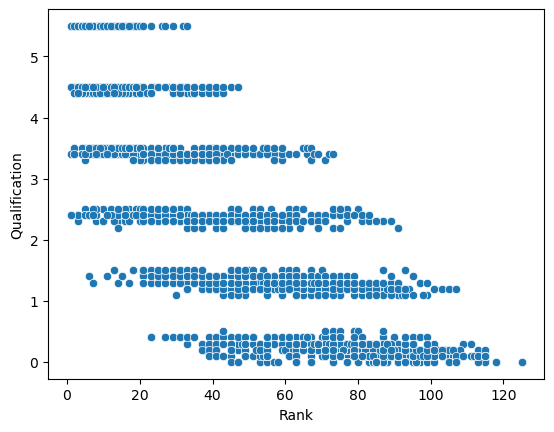

In [5]:
# rank and qualification scatterplot
scatter = sns.scatterplot (x='Rank', y='Qualification', data=boulder)

Hypothesis: The lower the rank, the higher the qualification scores.

# Linear Regression

In [6]:
# Reshape the variables into NumPy arrays
X=boulder['Rank'].values.reshape(-1,1)
y=boulder['Qualification'].values.reshape(-1,1)

In [9]:
# Split the data into a training set and a test set
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=0)

In [10]:
# Fit to training set
regression=LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [11]:
# predict the values of y using X
y_predicted = regression.predict(X_test)

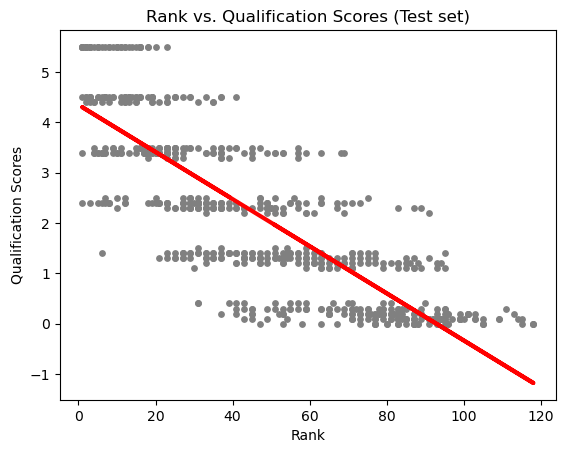

In [14]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Rank vs. Qualification Scores (Test set)')
plot_test.xlabel('Rank')
plot_test.ylabel('Qualification Scores')
plot_test.show()

Analysis:
While there is definitely a negative correlation, it is clear that scores can vary drastically from the regression line making it likely that a regression model will have severe limitations in predicting scores based on rank.

In [16]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [17]:
# model performance statistics—MSE and R2 score
print ('Slope:', regression.coef_)
print ('Mean squared error:', rmse)
print ( 'R2 score:', r2)

Slope: [[-0.04684599]]
Mean squared error: 0.9362053533314797
R2 score: 0.6516991428241752


In [18]:
# Compare the predicted y values with the actual y 
data=pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.4,1.959317
1,1.4,1.490857
2,3.5,3.083621
3,5.5,4.301617
4,4.5,3.926849
5,3.4,3.880003
6,3.4,3.552081
7,0.2,-0.382982
8,2.3,2.427777
9,1.1,1.022397


Thoughts on how well the model performed on the test?
The model is not a great fit. While it can give some ballpark predictions is isn't consistently close enough to the actual data. The actual data is too sporadic though does follow some a negative correlation trend losely.

Any reflections you have on the impact of possible data bias?
I don't believe there is data bias. There is however inconsistency of the level of difficulty for qualification competions that will impact the scores of competitors that should be taken into consideration (and also makes the qualification scores harder to predict.